***Q.1  What is a Support Vector Machine (SVM)?***

A Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that best separates data points of different classes in a high-dimensional space. The goal of SVM is to maximize the margin between classes to ensure robust classification.

***Q.2 Difference between Hard Margin and Soft Margin SVM***

Hard Margin SVM: Used when data is linearly separable. It finds a hyperplane with the maximum margin without allowing misclassification.

Soft Margin SVM: Used when data is not completely separable. It introduces a slack variable to allow some misclassification while still maximizing the margin.



***Q.3 Mathematical Intuition Behind SVM ?***

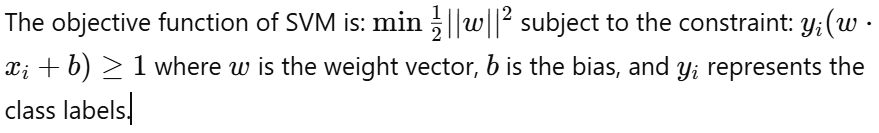

***Q.4 Role of Lagrange Multipliers in SVM***

Lagrange multipliers are used in SVM to convert the constrained optimization problem into an unconstrained dual problem. This helps in efficiently computing the optimal hyperplane using the Karush-Kuhn-Tucker (KKT) conditions.



***Q.5  What are Support Vectors in SVM ?***

Support vectors are the data points that lie closest to the decision boundary. These points determine the position and orientation of the hyperplane.


***Q.6 What is a Support Vector Classifier (SVC) ?***

A Support Vector Classifier (SVC) is an SVM model that is specifically designed for classification problems. It finds the best hyperplane to separate different classes in the dataset.


***Q.7 What is a Support Vector Regressor (SVR) ?***

Support Vector Regression (SVR) extends SVM to regression problems. Instead of maximizing the margin between classes, it aims to fit the best line within a given error margin (epsilon ).

***Q.8 What is the Kernel Trick in SVM ?***

The kernel trick allows SVM to transform the data into a higher-dimensional space where it becomes linearly separable, even if it wasn’t in the original space.


***Q.9 Compare Linear Kernel, Polynomial Kernel, and RBF Kernel***

Linear Kernel: Suitable for linearly separable data.

Polynomial Kernel: Captures interactions of features by using polynomial functions.

Radial Basis Function (RBF) Kernel: Maps data to infinite-dimensional space and works well for non-linearly separable data.

***Q.10 Effect of the C Parameter in SVM***

The C parameter controls the trade-off between maximizing the margin and minimizing misclassification. A high C results in a lower-margin classifier with fewer misclassifications, while a low C allows more misclassifications but leads to a better generalization.

***Q.11 Role of the Gamma Parameter in RBF Kernel SVM***

Gamma controls the influence of individual data points. A high gamma makes the model focus on fewer points, leading to overfitting, while a low gamma spreads the influence over many points, leading to underfitting.


***Q.12 What is the Naïve Bayes classifier, and why is it called "Naïve"?***

Naïve Bayes is a probabilistic classifier based on Bayes’ Theorem. It is called "naïve" because it assumes that all features are independent, which is often not true in real-world scenarios but simplifies computation.

***Q.13  What is Bayes’ Theorem?***

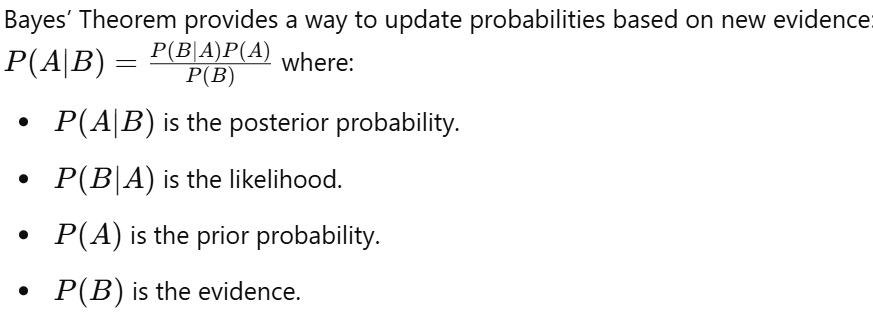

***Q.14 Differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes ?***

Gaussian Naïve Bayes: Assumes continuous data follows a Gaussian (normal) distribution.

Multinomial Naïve Bayes: Used for discrete data like word counts in text classification.

Bernoulli Naïve Bayes: Used for binary/boolean features.



***Q.15 When to Use Gaussian Naïve Bayes Over Other Variants ?***

Use Gaussian Naïve Bayes when features are continuous and approximately normally distributed.


***Q.16 Key Assumptions of Naïve Bayes***

Features are independent (Naïve assumption).

Each feature contributes equally to the outcome.

Data distribution follows a specific type (Gaussian, Multinomial, or Bernoulli).

***Q.17 What are the advantages and disadvantages of Naïve Bayes ?***

**Advantages:**

Works well with small datasets.

Fast and efficient for text classification.

Handles missing data effectively.

**Disadvantages:**

Assumes feature independence, which may not hold.

Struggles with highly correlated features.

Performs poorly when feature distribution is very different from the assumed distribution.


***Q.18 Why is Naïve Bayes a good choice for text classification ?***

Works well with high-dimensional data.

Handles sparse data effectively.

Fast training and prediction speed.

Performs well with small training datasets.


***Q.19 Compare SVM and Naïve Bayes for classification tasks ?***

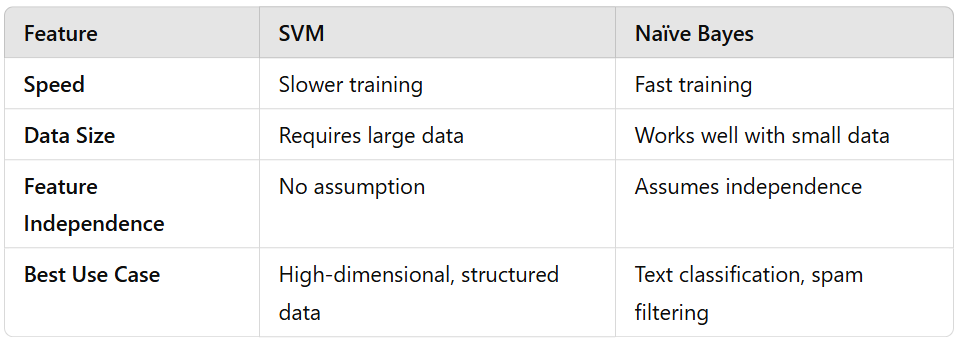

***Q.20 How does Laplace Smoothing help in Naïve Bayes ?***

Laplace Smoothing (or Additive Smoothing) prevents probability estimates from being zero by adding a small constant (
𝛼
α) to the frequency counts:

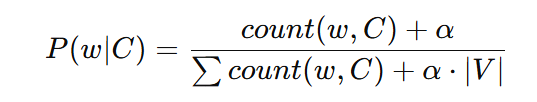

where
∣
𝑉
∣
∣V∣ is the vocabulary size. This ensures no probability is zero, making predictions more robust.

***PRACTICLE***


SVM Accuracy on Iris dataset: 1.0
Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556
SVR Mean Squared Error: 1.3320115421348744


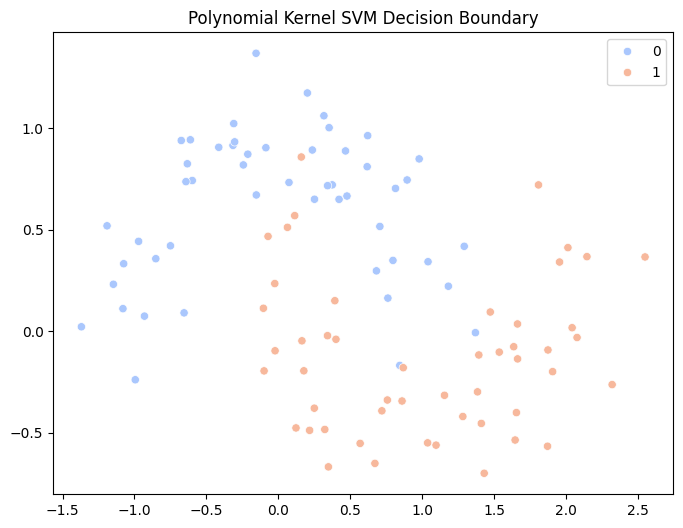

GaussianNB Accuracy on Breast Cancer dataset: 0.9736842105263158
MultinomialNB Accuracy on Text Data: 0.9830985915492958


In [6]:
# Google Colab Notebook: SVM and Naive Bayes Classifiers

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, precision_recall_fscore_support, roc_auc_score, log_loss, mean_absolute_error, precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline

# 1. Train an SVM Classifier on the Iris dataset and evaluate accuracy
def svm_iris():
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("SVM Accuracy on Iris dataset:", accuracy_score(y_test, y_pred))

# 2. Train SVM classifiers with Linear and RBF kernels on the Wine dataset and compare accuracies
def svm_wine():
    wine = datasets.load_wine()
    X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
    model_linear = SVC(kernel='linear')
    model_rbf = SVC(kernel='rbf')
    model_linear.fit(X_train, y_train)
    model_rbf.fit(X_train, y_train)
    print("Linear Kernel Accuracy:", accuracy_score(y_test, model_linear.predict(X_test)))
    print("RBF Kernel Accuracy:", accuracy_score(y_test, model_rbf.predict(X_test)))

# 3. Train an SVM Regressor (SVR) on a housing dataset and evaluate using MSE
def svr_housing():
    boston = datasets.fetch_california_housing()
    X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)
    model = SVR()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("SVR Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 4. Train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary
def svm_poly_visual():
    X, y = datasets.make_moons(noise=0.2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = SVC(kernel='poly', degree=3)
    model.fit(X_train, y_train)

    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='coolwarm')
    plt.title("Polynomial Kernel SVM Decision Boundary")
    plt.show()

# 5. Train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy
def gnb_breast_cancer():
    cancer = datasets.load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("GaussianNB Accuracy on Breast Cancer dataset:", accuracy_score(y_test, y_pred))

# 6. Train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
def multinomial_nb_text():
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer

    newsgroups = fetch_20newsgroups(subset='train', categories=['rec.sport.baseball', 'sci.space', 'comp.graphics'])
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(newsgroups.data)
    y = newsgroups.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MultinomialNB Accuracy on Text Data:", accuracy_score(y_test, y_pred))

if __name__ == "__main__":
    svm_iris()
    svm_wine()
    svr_housing()
    svm_poly_visual()
    gnb_breast_cancer()
    multinomial_nb_text()
